In [24]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [25]:
movies=pd.read_csv('imdb_labelled.txt', sep='\t', names=['Review', 'Score'])
movies.head()

,Review,Score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [26]:
#a closer look at negative words 
bad=movies.loc[(movies['Score']==0)]

In [27]:
#pick the following words as bad/negative words
words=['bad','worst','not','slow','lost','dumb','awful','bored','boring','worse','worst','waste','wasted','poor',
         'garbage','pointless','can\'t','don\'t','avoid','trash','terrible','didn\'t','lame','unpleasant','not',
         'disappointed','good','amazing','great','entertaining','loved','enjoy','enjoyed']
for word in words:
        movies[str(word)]=movies['Review'].str.contains(' '+str(word)+' ', case=False)

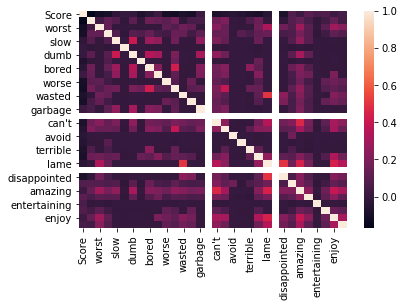

In [28]:
#create heatmap
sns.heatmap(movies.corr())

In [29]:
from sklearn.naive_bayes import BernoulliNB
data=movies[words]
target=movies['Score']

# Instantiate our model and store it in a new variable.
#fit model to data
# Classify, storing the result in a new variable.
bnb=BernoulliNB()
bnb.fit(data, target)
y_pred=bnb.predict(data)

#share results
print(f'Number of mislabeled point out of {data.shape[0]}:{(target != y_pred).sum()}')

Number of mislabeled point out of 748:279


In [30]:
# Test model with different holdout groups.
# Train_test_split is used to create the necessary training and test groups
X_train, X_test, y_train, y_test=train_test_split(data, target, test_size=0.2, random_state=20)
print(f'With 20% Holdout: {bnb.fit(X_train, y_train).score(X_test, y_test)}')
print(f'Testing on Sample: {bnb.fit(data, target).score(data, target)}')

With 20% Holdout: 0.5933333333333334
Testing on Sample: 0.6270053475935828


In [31]:
#confusion matrix - shows count of each possible permutation of target and prediction.
df_confusion=pd.crosstab(target, y_pred)
df_confusion
#we can observe that 23 from 279 errors are from failure to identify negative words.

col_0,0,1
Score,,
0,106,256
1,23,363


In [32]:
#cross validation by breaking up data into 10 folds
cross_val_score(bnb, data, target, cv=10)
#there are fluctuations, ranging from 0.533 to 0.68, suggesting a degree of overfitting.
# the array would be consistent in the absence of overfitting.

array([0.59210526, 0.59210526, 0.53333333, 0.64      , 0.68      ,
       0.6       , 0.64864865, 0.64864865, 0.55405405, 0.68918919])